<a href="https://colab.research.google.com/github/yoojunT/National_Land_Cover_Database_Fetching-in_Python./blob/main/National_Land_Cover_Database_(NLCD)_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install rasterio
!pip install --upgrade rasterio

In [3]:
# Import Libraries
import rasterio
import os
import pyproj
from rasterio.transform import rowcol
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

In [4]:
# Download National Land Cover Database (NLCD)at https://www.mrlc.gov/data?f%5B0%5D=category%3ALand%20Cover&f%5B1%5D=region%3Aconus&f%5B2%5D=year%3A2021

# Define the path to your raster file
folder_path = '{your_folder_path}}'

img_file_name = 'nlcd_2021_land_cover_l48_20230630.img'
ige_file_name = 'nlcd_2021_land_cover_l48_20230630.ige'

img_file_path = os.path.join(folder_path, img_file_name)
ige_file_path = os.path.join(folder_path, ige_file_name)

# Check if the file exists
print(os.path.exists(img_file_path))
print(os.path.exists(ige_file_path))

True
True


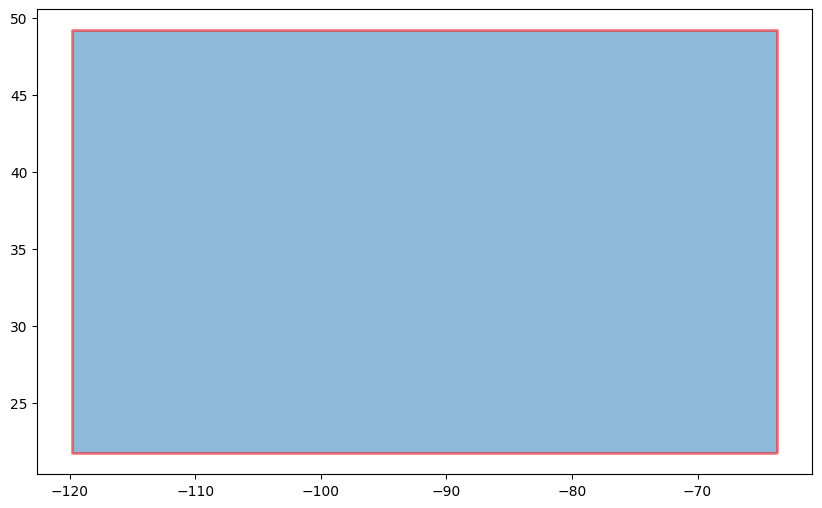

In [5]:
# Open the raster dataset
dataset = rasterio.open(img_file_path)

# Extract the bounding box coordinates
left, bottom, right, top = dataset.bounds

# Define the original CRS and the target CRS (WGS84)
original_crs = dataset.crs
target_crs = 'EPSG:4326'

# Create a PyProj transformer to perform the coordinate transformation
transformer = pyproj.Transformer.from_crs(original_crs, target_crs, always_xy=True)

# Transform the bounding box coordinates to WGS84
left_wgs84, bottom_wgs84 = transformer.transform(left, bottom)
right_wgs84, top_wgs84 = transformer.transform(right, top)

# Create a bounding box geometry in WGS84
bbox_geometry_wgs84 = box(left_wgs84, bottom_wgs84, right_wgs84, top_wgs84)

# Create a GeoDataFrame with the bounding box geometry in WGS84
bbox_gdf_wgs84 = gpd.GeoDataFrame({'geometry': [bbox_geometry_wgs84]}, crs=target_crs)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the bounding box in WGS84
bbox_gdf_wgs84.plot(ax=ax, alpha=0.5, edgecolor='red', linewidth=2)

# Show the plot
plt.show()

In [6]:
# Create a list of locations with their coordinates
locations = [
    {"name": "New York City", "latitude": 40.7128, "longitude": -74.0060},
    {"name": "Grand Canyon", "latitude": 36.1070, "longitude": -112.1130},
    {"name": "Los Angeles", "latitude": 34.0522, "longitude": -118.2437},
    {"name": "Houston", "latitude": 29.7604, "longitude": -95.3698},
]

# Iterate through the list of locations
for location in locations:
    name = location["name"]
    latitude = location["latitude"]
    longitude = location["longitude"]

    # Reverse transform the latitude and longitude to the original CRS of the raster dataset
    x, y = transformer.transform(longitude, latitude, direction='INVERSE')

    # Read the pixel value at the transformed coordinates
    pixel_values = [val for val in dataset.sample([(x, y)])]

    # Print the pixel value
    if pixel_values:
        print(f"{name} - Pixel Value:", pixel_values[0])
    else:
        print(f"No data found at {name} coordinates.")

New York City - Pixel Value: [24]
Grand Canyon - Pixel Value: [52]
Los Angeles - Pixel Value: [24]
Houston - Pixel Value: [24]
